# Fundamentals Of Data Analysis - Tasks

**Kevin O'Leary**

***

## Task 1 - Collatz Function

>Verify, using Python, that the Collatz conjecture is true for the first 10,000 positive integers.

In [1]:
def f(x):
  #If x is even, divide it by two.
  if x % 2 == 0:
    return x // 2
  else:
    return (3 * x) + 1

In [2]:
conjecture_success = []  # If the conjecture works "True" will be added to this list. If it fails "False" will. This way we  
                         # can check it works without printing out all sequences. 

In [3]:
def collatz(x):
  while x != 1:          # if we run x as 1 it will get caught in a loop. we want it to stop when x = 1,   
                         # as the conjecture is then true for that value
    
    #print(x, end=', ')  # this would print out each digit in the sequence for each value which is un-neccessary.  
                         # We just need to know if its true.
    x=f(x)
  
  if x == 1: 
    conjecture_success.append("True")     # if the last value of x is 1, then it conforms to the collatz conjecture  
                                          # and the result "True" is added to our list. 
  elif x != 1:       
    conjecture_success.append("False")    # if the last value of x isnt 1, then it has failed the collatz conjecture  
                                          # and the result "False" is added to our list.
      
  

In [4]:
x = 1
while x <= 10000:  #  a while loop running the collatz function for all values 1-10,000
  collatz(x)
  x += 1


In [5]:
if "False" in conjecture_success:
  print("The conjecture has been disproven")
else:
  print("Conjecture is true for all values up to 10,000")


Conjecture is true for all values up to 10,000


## Task 2 - Penguin Dataset 

>Summary of the Penguin Database and suggest variables that could be used to model it

**Summary**

The penguins dataset was collected by Dr Kristen Gorman at the Palmer Station in Antartica. it contains information about different species of penguins at the Palmer Archipeligo. It is commonly used to demonstrate various data analyses and machine learning techniques. 

In [6]:
import seaborn as sb
#Seaborn is a Data Visualisation Library. It contains a number of datasets including penguins.csv. 

In [7]:
import pandas as pd


In [8]:
sb.get_dataset_names()

# Returns a list of all datasets within Seaborn

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [9]:
df = sb.load_dataset('penguins')

# loads the penguins dataset. 
# ref: https://seaborn.pydata.org/tutorial/introduction.html

In [10]:
df.shape

# displays how many rows/columns there are.

(344, 7)

The dataframe is made up of 7 columns and 344 rows

In [11]:
df.head()

# Initial look at the dataset to ensure its what we were looking for. The head function allows you to see the first 5 rows in the dataframe

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


From looking at the above we can see the dataframe is made up for 7 columns of different variables. Species, Island of Origin, Bill Length (mm), Bill Depth (mm), Flipper Length (mm), body mass (g) and Sex

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Pandas classification of datatypes is a little different to Python. In Python we have the datatypes; int, float, string and bool. However in Pandas int is classified as 'int64', float as 'float64', a string as 'object' and bool remains the same. 

Based on the above, 'species', 'island' and 'sex are strings in Python and object in pandas. The other columns that contain measurements area all floats in Python and float64 in Pandas. This is what we would expect based on the contents of the columns above. 

Ref: https://pbpython.com/pandas_dtypes.html

# Task 3 - Probability Distribution

>For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list
is the most appropriate to model the variable.

> The easiest manner to determine the underlying distribution is by visually inspecting the random variable(s) using a histogram. 

ref: https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd


In [14]:
import matplotlib.pyplot as plt
import numpy as np


In [15]:
species = df['species']
island = df['island']
bill_len = df['bill_length_mm']
bill_depth = df['bill_depth_mm']
flip_len = df['flipper_length_mm']
body_mass = df['body_mass_g']
sex = df['sex']


For the categorical variables (species, island and sex) it is best to use a bar chart to display the distribution. For the continuous variables a histogram is better. 

In [58]:
#Sex, counts = np.unique(sex, return_counts=True) 

#fig, ax = plt.subplots()

#ax.bar(Sex, counts);
#ax.set_ylabel("Number of Penguins")
#ax.set_title("Distribution of Male vs Female Penguins")

I tried plotting the distribution of Male vs Female Penguins using the cell above. As you can see when plotting the sex dataframe, an error is produced. This is due to the missing values NaN.  To resolve this and to compare solely the male vs female distribution I am going to [remove any null values.](https://www.w3schools.com/python/pandas/ref_df_dropna.asp) 

In [54]:
sex.info()

#Here we can see there is 344 entries in this dataframe

<class 'pandas.core.series.Series'>
RangeIndex: 344 entries, 0 to 343
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
333 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [53]:

sex2 = sex.dropna()
sex2.info()

#After removing the null values there are only 333 entires. 10 null values have been removed. 

<class 'pandas.core.series.Series'>
Index: 333 entries, 0 to 343
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
333 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB


Text(0.5, 1.0, 'Distribution of Penguin Species')

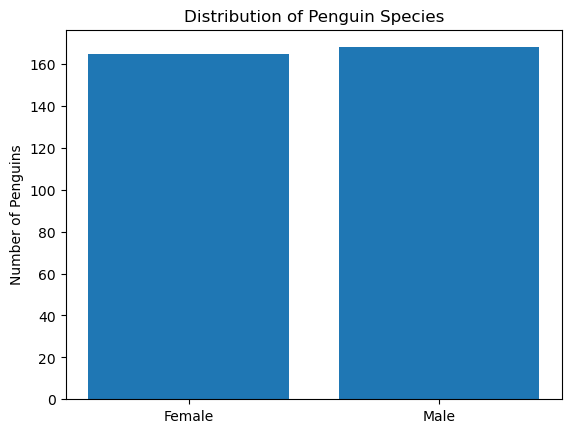

In [57]:
Sex, counts0 = np.unique(sex2, return_counts=True) 

fig, ax = plt.subplots()

ax.bar(Sex, counts0);
ax.set_ylabel("Number of Penguins")
ax.set_title("Distribution of Male vs Female Penguins")


There is an almost equal frequency of Male vs Female penguins in the Dataset. This would suggest a uniform distribution.  

A [uniform distribution](https://numpy.org/doc/1.16/reference/generated/numpy.random.uniform.html#numpy.random.uniform) has no peak and is constant across the range which means all values are equally likely

To be more specific as there are only two possible values in this case it would be a [discrete uniform distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) as there is a finite number of outcomes. 

In [17]:
Spec, counts = np.unique(species, return_counts=True) 
# will produce two arrays, one with the species name and one with the number of times that species appears in the dataset. 



Text(0.5, 1.0, 'Distribution of Penguin Species')

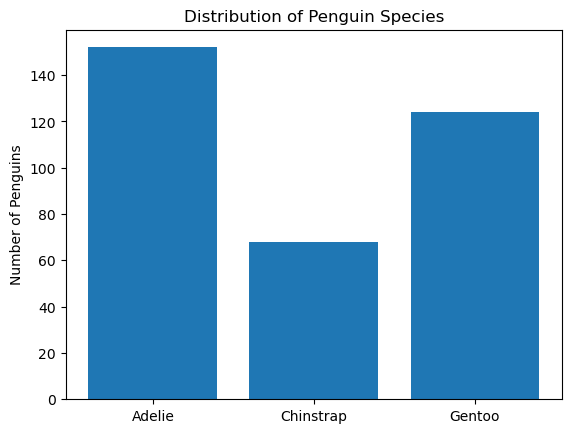

In [18]:
# Plot a bar chart with these values
fig, ax = plt.subplots()

ax.bar(Spec, counts);
ax.set_ylabel("Number of Penguins")
ax.set_title("Distribution of Penguin Species")
             

Text(0.5, 1.0, 'Distribution of Penguins on each Island')

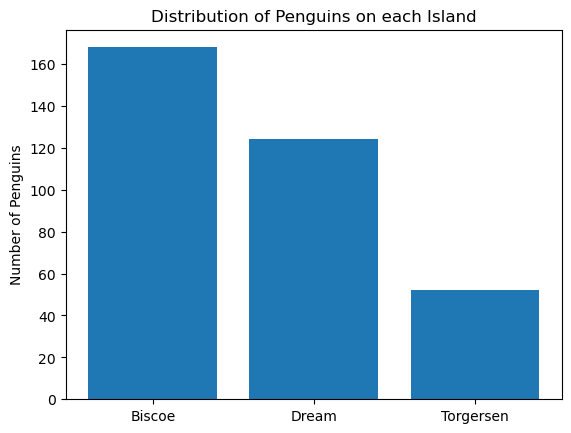

In [19]:
# Bar chart of showing distribution of penguins across the 3 Islands. 

Islands, counts1 = np.unique(island, return_counts=True) 

fig, ax = plt.subplots()

ax.bar(Islands, counts1);
ax.set_ylabel("Number of Penguins")
ax.set_title("Distribution of Penguins between each Island")

In [20]:
Peng_Sex, counts2 = np.unique(sex_str, return_counts=True) 


In [33]:


#fig, ax = plt.subplots()

#x.bar(Peng_Sex, counts2)
#ax.set_ylabel("Number of Penguins")
#ax.set_title("Distribution of Male and Female Penguins")

Create a histogram with 19 binsfor each variable.  [To assign a correct number of bins](https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/), we need to find the square root of the number of data points (344) and round it up. 

$\sqrt{344}$ = 18.55

Text(0.5, 0, 'Number of Penguins')

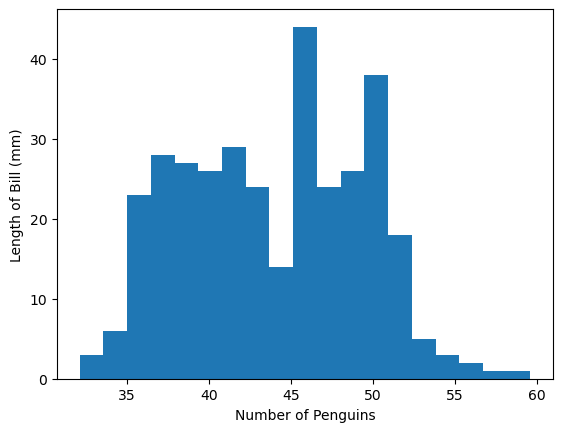

In [22]:
plt.hist(bill_len, 19)
plt.ylabel("Length of Bill (mm)")
plt.xlabel("Number of Penguins")



Text(0.5, 0, 'Number of Penguins')

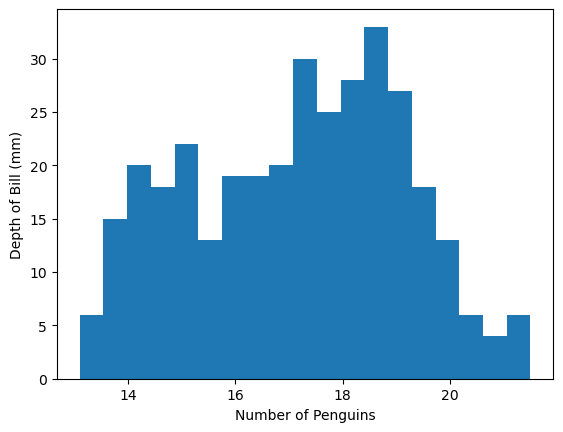

In [23]:
plt.hist(bill_depth, 19)
plt.ylabel("Depth of Bill (mm)")
plt.xlabel("Number of Penguins")


Text(0.5, 0, 'Number of Penguins')

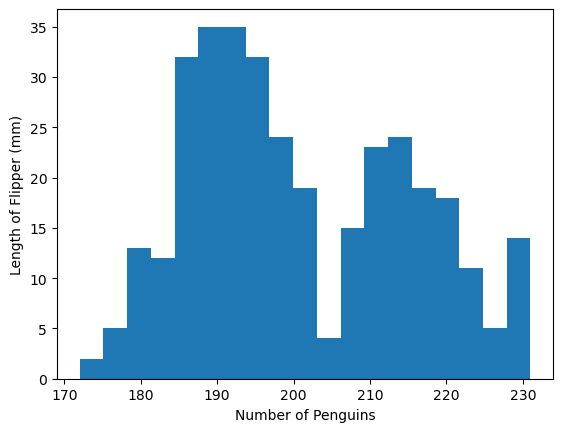

In [24]:
plt.hist(flip_len, 19)
plt.ylabel("Length of Flipper (mm)")
plt.xlabel("Number of Penguins")

Text(0.5, 0, 'Number of Penguins')

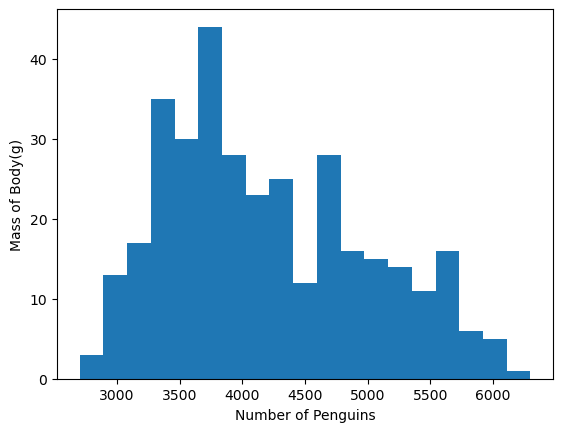

In [25]:
plt.hist(body_mass, 19)
plt.ylabel("Mass of Body(g)")
plt.xlabel("Number of Penguins")

the distribution of the continuous variables doesn't fit a recognisable distribution. this could be because these variables differ based on species. Perhaps we should seperate them by species and then plot them. 

c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


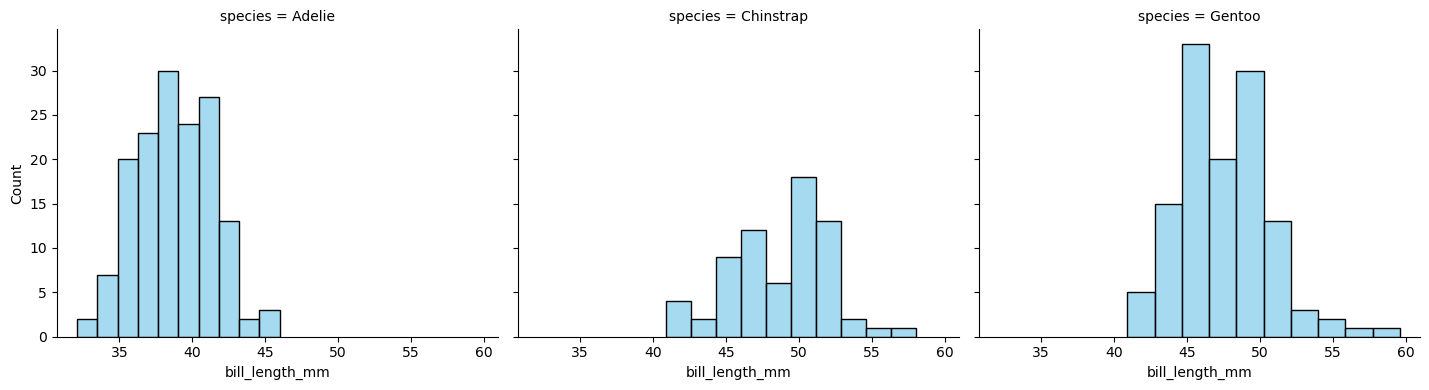

In [31]:
bl = sb.FacetGrid(df, col="species", height=4, aspect=1.2)

bl.map(sb.histplot, 'bill_length_mm', bins=10, color="skyblue", label="Bill Length")

c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


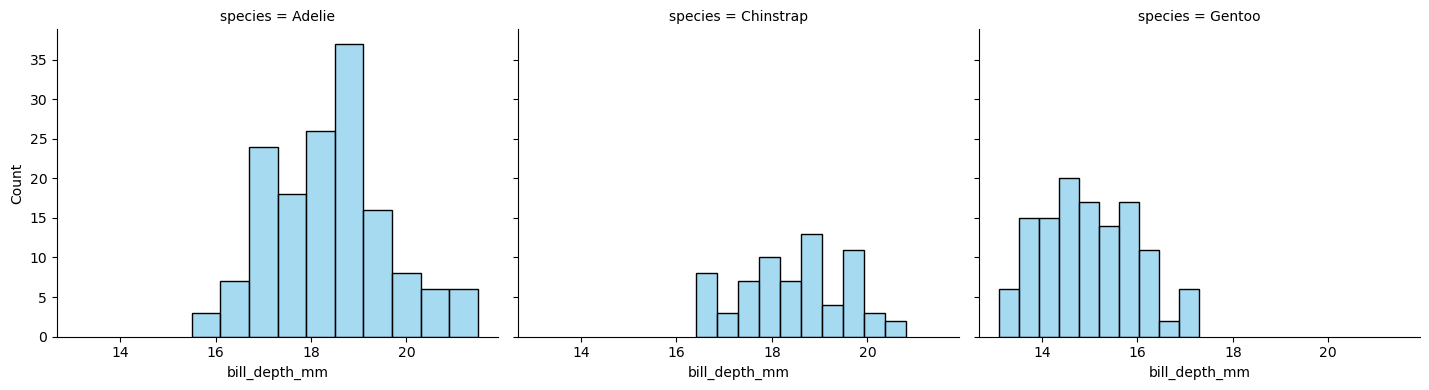

In [29]:
bd = sb.FacetGrid(df, col="species", height=4, aspect=1.2)

bd.map(sb.histplot, 'bill_depth_mm', bins=10, color="skyblue", label="Bill Depth")

c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


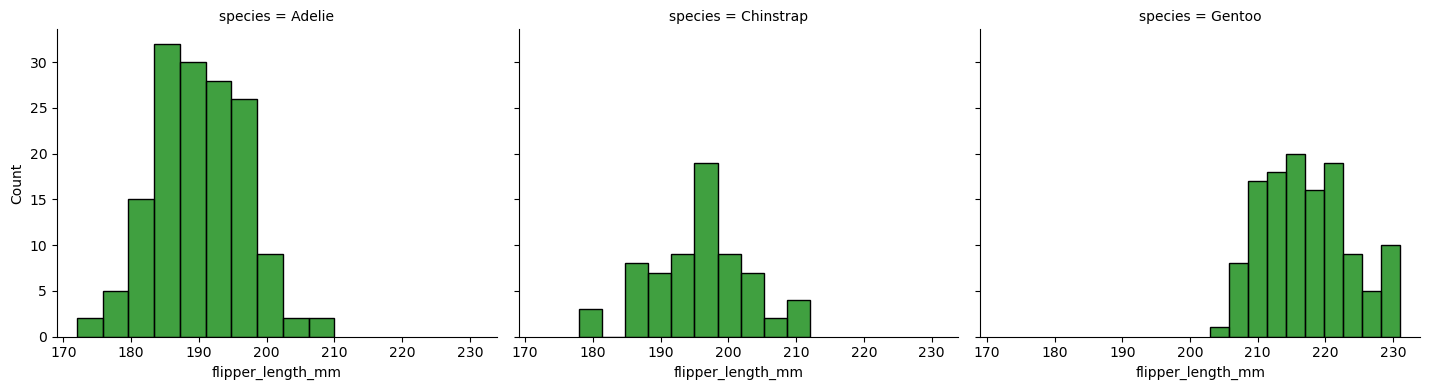

In [30]:
fl = sb.FacetGrid(df, col="species", height=4, aspect=1.2)
fl.map(sb.histplot, 'flipper_length_mm', bins=10, color="green", label="Flipper Length")

c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


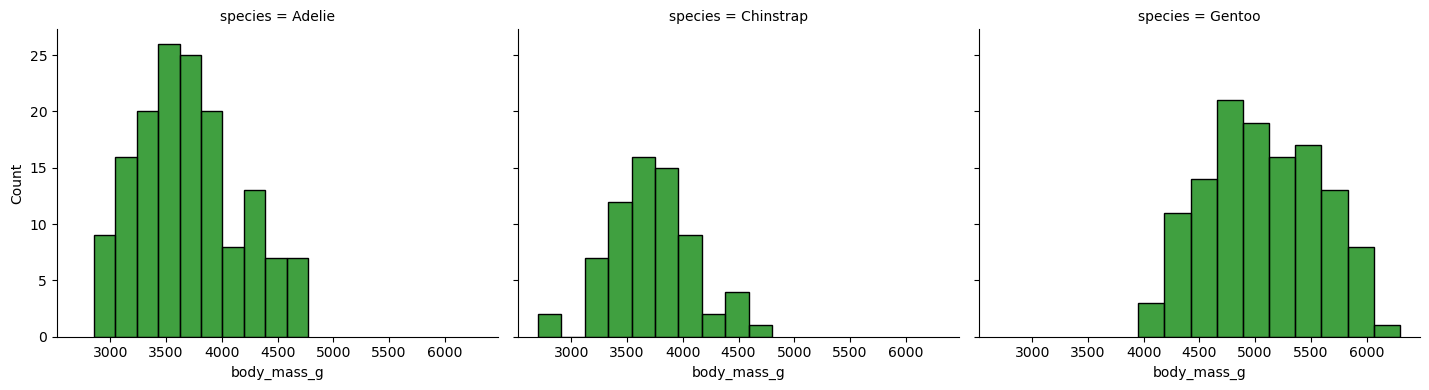

In [32]:
bg = sb.FacetGrid(df, col="species", height=4, aspect=1.2)
bg.map(sb.histplot, 'body_mass_g', bins=10, color="green", label="Body Mass (g)")

After separating the variables by 'Species', the distribution of the four variables seems to match a normal Gaussian distribution.

- They all approximately fall under the bell-shaped curve. 
- They are concentrated around the mean, and the frequency drops the further you move in either direction. 
- There is a single peak in each plot
- There is a rough symmetry to the plots as well

***

## End